# Lesson 2 Exercise 3: Creating Fact and Dimension Tables with Star Schema


### Walk through the basics of modeling data using Fact and Dimension tables. You will create both Fact and Dimension tables and show how this is a basic element of the Star Schema. 

#### Where you see ##### you will need to fill in code. 

### This exercise will be more challenging than the last. Use the information provided to create the tables and write the insert statements. 


Note: __Do not__ click the blue Preview button at the bottom

### Import the library 
Note: An error might popup after this command has exectuted. If it does read it careful before ignoring. 

In [1]:
import psycopg2

### Create a connection to the database

In [2]:
try: 
    conn = psycopg2.connect(
        host="localhost",
        user="dantencv",
        database="postgres",
        password="20Masa20")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)

### Next use that connect to get a cursor that we will use to execute queries.

In [3]:
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get cursor to the Database")
    print(e)

#### For this demo we will use automactic commit so that each action is commited without having to call conn.commit() after each command. The ability to rollback and commit transactions is a feature of Relational Databases. 

In [4]:
conn.set_session(autocommit=True)

### Imagine you work at an online Music Store. There will be many tables in our database, but let's just focus on 4 tables around customer purchases. 
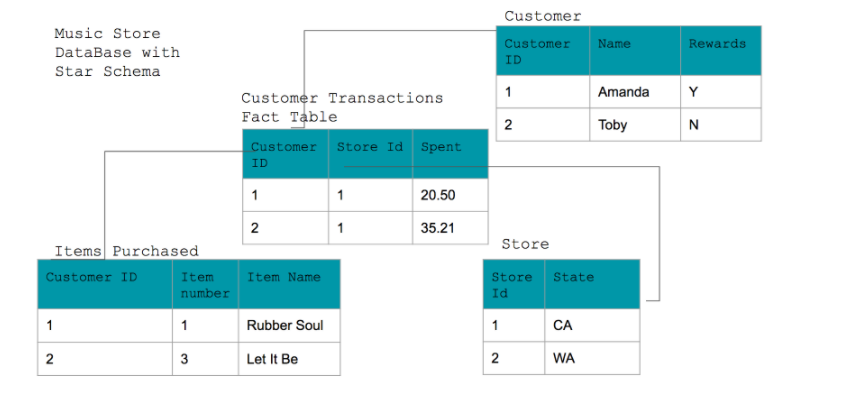
### From this representation you can start to see the makings of a "STAR". You will have one fact table (the center of the star) and 3  dimension tables that are coming from it.

### TO-DO: Create the Fact table and insert the data into the table

In [5]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS Fact_table(customer_id int, store_id int, spent numeric)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
#Insert into all tables 
try: 
    cur.execute("INSERT INTO Fact_table (customer_id,store_id,spent) VALUES (%s,%s,%s)",(1,1,20.50))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
try: 
    cur.execute("INSERT INTO Fact_table (customer_id,store_id,spent) VALUES (%s,%s,%s)",(2,1,35.21))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)


### TO-DO: Create the Dimension tables and insert data into those tables.

In [6]:
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS item_purchase (customer_id int, item_number int, item_name varchar)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
   cur.execute("INSERT INTO item_purchase (customer_id,item_number,item_name) VALUES (%s,%s,%s)",(1,1,"Rubber Soul"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("INSERT INTO item_purchase (customer_id,item_number,item_name) VALUES (%s,%s,%s)",(2,3,"Let it be"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS store (store_id int, state varchar)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO store (store_id,state) VALUES (%s,%s)",(1,"CA"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
try: 
   cur.execute("INSERT INTO store (store_id,state) VALUES (%s,%s)",(2,"Let it be"))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)
    
try: 
    cur.execute("CREATE TABLE IF NOT EXISTS customer (customer_id int, customer_name varchar, rewards boolean)")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)
    
try: 
    cur.execute("INSERT INTO customer (customer_id,customer_name,rewards) VALUES (%s,%s,%s)",(1, "Amanda",True))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

try: 
    cur.execute("INSERT INTO customer  (customer_id,customer_name,rewards)  VALUES (%s,%s,%s)",(2, "Toby",False))
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

### Now run the following queries on this data easily because of utilizing the Fact/ Dimension and Star Schema
 
#### Query 1: Find all the customers that spent more than 30 dollars, who are they, which store they bought it from, location of the store, what they bought and if they are a rewards member.

#### Query 2: How much did Customer 2 spend?

### Query 1:

In [9]:
##Fact_table(customer_id int, store_id int, spent int)
try: 
    cur.execute("SELECT c.customer_name, s.store_id,s.state,i.item_name,c.rewards, sum(f.spent)  \
    FROM Fact_table f join customer c on f.customer_id=c.customer_id JOIN item_purchase i on f.customer_id=i.customer_id\
    JOIN store s on s.store_id=f.store_id group by c.customer_name, s.store_id,s.state,i.item_name,c.rewards \
    HAVING sum(f.spent)>30")
    
    
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

('Toby', 1, 'CA', 'Let it be', False, 35)


### Your output from the above cell should look like this:
('Toby', 1, 'CA', 'Let It Be', False)

### Query 2: 

In [10]:
try: 
    cur.execute("SELECT c.customer_id, sum(f.spent)  \
    FROM Fact_table f join customer c on f.customer_id=c.customer_id group by c.customer_id \
    HAVING sum(f.spent)>30")
    
    
except psycopg2.Error as e: 
    print("Error: select *")
    print (e)

row = cur.fetchone()
while row:
   print(row)
   row = cur.fetchone()

(2, 35)


### Your output from the above cell should include Customer 2 and the amount: 
(2, 35.21)

### Summary: You can see here from this elegant schema that we were: 1) able to get "facts/metrics" from our fact table (how much each store sold), and 2) information about our customers that will allow us to do more indepth analytics to get answers to business questions by utilizing our fact and dimension tables. 

### TO-DO: Drop the tables

In [11]:
try: 
    cur.execute("DROP TABLE Fact_table")
    
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

try: 
    cur.execute("DROP TABLE customer")
    
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)
    
try: 
    cur.execute("DROP TABLE item_purchase")
    
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

try: 
    cur.execute("DROP TABLE store")
    
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

### And finally close your cursor and connection. 

In [12]:
cur.close()
conn.close()